In [158]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import geopandas
import pandas
import shapely.geometry
import copy
from shapely.geometry import MultiLineString, LineString, MultiPoint, Point
import numpy as np
import json
from pathlib import Path

import fiona
import pytess

In [3]:
pnt = geopandas.read_file("H:/GISC425/Assignment/bus_stops.shp")
lpnt = geopandas.read_file("H:/GISC425/Assignment/linepointstreet.shp")
ppnt = geopandas.read_file("H:/GISC425/Assignment/polypoints.shp")

In [203]:
pnt.crs

{'init': 'epsg:4326'}

In [4]:
pnt.head()

,full_id,osm_id,osm_type,highway,name,shelter,name_en,ref,geometry
0,n729613537,729613537,node,bus_stop,Bus Stop 6910,None,None,None,POINT (174.7787019 -41.2929918)
1,n1010238204,1010238204,node,bus_stop,5000,yes,None,None,POINT (174.78246 -41.293858)
2,n1010239992,1010239992,node,bus_stop,None,yes,None,None,POINT (174.7849295 -41.2921881)
3,n1010242406,1010242406,node,bus_stop,5516,yes,None,None,POINT (174.7826853 -41.293737)
4,n1010242745,1010242745,node,bus_stop,None,yes,None,None,POINT (174.7772012 -41.295185)


In [5]:
lpnt.head()

,street,geometry
0,5181907,POINT (174.7803093057093 -41.29001958879277)
1,5181907,POINT (174.7802828114186 -41.29006497758554)
2,5181907,POINT (174.7802566858595 -41.29011057839095)
3,5181907,POINT (174.7802307878796 -41.29015631004939)
4,5181907,POINT (174.7802048898997 -41.29020204170782)


In [6]:
ppnt.head()

,bound,geometry
0,26509771,POINT (174.7843606528178 -41.29294613444772)
1,26509771,POINT (174.7842179274404 -41.29287714400327)
2,26509771,POINT (174.7841846976851 -41.29278562101244)
3,26509771,POINT (174.7840554703083 -41.29278900468544)
4,26509771,POINT (174.7839417773234 -41.29272648852628)


In [340]:
ppnt['id']=ppnt['bound']
lpnt['id']=lpnt['street']
pnt['id']=pnt['osm_id']

In [391]:
pnt.head()

,full_id,osm_id,osm_type,highway,name,shelter,name_en,ref,geometry,id
0,n729613537,729613537,node,bus_stop,Bus Stop 6910,None,None,None,POINT (174.7787019 -41.2929918),729613537
1,n1010238204,1010238204,node,bus_stop,5000,yes,None,None,POINT (174.78246 -41.293858),1010238204
2,n1010239992,1010239992,node,bus_stop,None,yes,None,None,POINT (174.7849295 -41.2921881),1010239992
3,n1010242406,1010242406,node,bus_stop,5516,yes,None,None,POINT (174.7826853 -41.293737),1010242406
4,n1010242745,1010242745,node,bus_stop,None,yes,None,None,POINT (174.7772012 -41.295185),1010242745


In [341]:
allpnt = pandas.concat([ppnt, lpnt, pnt], sort=True, ignore_index=True)
allpnt.crs = pnt.crs
allpnt = allpnt.to_crs({'init': 'epsg:2193'})

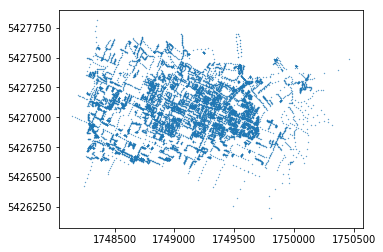

In [208]:
allpnt.plot(markersize=.1)

In [342]:
allpnt['x'] = allpnt['geometry'].x
allpnt['y'] = allpnt['geometry'].y

In [343]:
points_array=np.array([[allpnt['x'][k], allpnt['y'][k]] for k in range(len(allpnt))])

In [393]:
allpnt.tail()

,bound,full_id,geometry,highway,id,name,name_en,osm_id,osm_type,ref,shelter,street,x,y
17865,NaN,n1010243810,POINT (1749043.77724688 5427169.347834001),bus_stop,1010243810,Bus Stop 5002,None,1010243810,node,None,yes,NaN,1.749044e+06,5.427169e+06
17866,NaN,n1010245188,POINT (1749036.104733175 5427196.339420348),bus_stop,1010245188,None,5514,1010245188,node,None,yes,NaN,1.749036e+06,5.427196e+06
17867,NaN,n1010245728,POINT (1748884.562267276 5427151.108478437),bus_stop,1010245728,None,None,1010245728,node,None,None,NaN,1.748885e+06,5.427151e+06
17868,NaN,n1010245981,POINT (1749628.805520418 5427327.084351795),bus_stop,1010245981,None,None,1010245981,node,6513,yes,NaN,1.749629e+06,5.427327e+06
17869,NaN,n1166098700,POINT (1748816.498501843 5427356.35805293),bus_stop,1166098700,Bus Stop 5515,None,1166098700,node,None,None,NaN,1.748816e+06,5.427356e+06


In [345]:
voronois = pytess.voronoi(points_array)

In [346]:
voronois[:5]

[(array([ 1749804.03499353,  5426159.12744853]),
  [(1749634.5556022243, 5426171.4562569475),
   (1749999.659742675, 5426241.943687693),
   (1751153.924141602, 5425638.6648634365),
   (1752734.4833414927, 5422788.6953548),
   (1749500.3307849427, 5425746.301112856)]),
 (array([ 1749488.71955403,  5426258.67500862]),
  [(1749634.5556022243, 5426171.4562569475),
   (1749637.192191773, 5426233.496351639),
   (1749405.8866228736, 5426338.27718299),
   (1749030.7018424517, 5425951.702949286),
   (1749500.3307849427, 5425746.301112856)]),
 (array([ 1749787.26572025,  5426245.98734743]),
  [(1749637.192191773, 5426233.496351639),
   (1749657.2469856518, 5426298.367083199),
   (1749921.6108365355, 5426289.946690683),
   (1749954.4100458247, 5426279.393142428),
   (1749999.659742675, 5426241.943687693),
   (1749634.5556022243, 5426171.4562569475)]),
 (array([ 1749520.35182197,  5426328.50380877]),
  [(1749657.2469856518, 5426298.367083199),
   (1749656.6419573429, 5426310.150392954),
   (174944

In [356]:
vorpolys = []
for pt, poly in voronois:
    vorpolys.append(shapely.geometry.Polygon(poly))

In [357]:
poly_df = geopandas.GeoDataFrame(geometry=geopandas.GeoSeries(vorpolys))
poly_df.crs = allpnt.crs

In [362]:
poly_df.geometry.head()

0    POLYGON ((1749634.555602224 5426171.456256947,...
1    POLYGON ((1749634.555602224 5426171.456256947,...
2    POLYGON ((1749637.192191773 5426233.496351639,...
3    POLYGON ((1749657.246985652 5426298.367083199,...
4    POLYGON ((1749921.610836535 5426289.946690683,...
Name: geometry, dtype: object

In [358]:
voronois_df=geopandas.sjoin(poly_df, allpnt, how='left', op='contains')

In [359]:
voronois_df.head()

,geometry,index_right,bound,full_id,highway,id,name,name_en,osm_id,osm_type,ref,shelter,street,x,y
0,"POLYGON ((1749634.555602224 5426171.456256947,...",8576.0,NaN,NaN,NaN,26345540,NaN,NaN,NaN,NaN,NaN,NaN,26345540,1.749804e+06,5.426159e+06
1,"POLYGON ((1749634.555602224 5426171.456256947,...",7520.0,NaN,NaN,NaN,24529659,NaN,NaN,NaN,NaN,NaN,NaN,24529659,1.749489e+06,5.426259e+06
2,"POLYGON ((1749637.192191773 5426233.496351639,...",8577.0,NaN,NaN,NaN,26345540,NaN,NaN,NaN,NaN,NaN,NaN,26345540,1.749787e+06,5.426246e+06
3,"POLYGON ((1749657.246985652 5426298.367083199,...",7521.0,NaN,NaN,NaN,24529659,NaN,NaN,NaN,NaN,NaN,NaN,24529659,1.749520e+06,5.426329e+06
4,"POLYGON ((1749921.610836535 5426289.946690683,...",8578.0,NaN,NaN,NaN,26345540,NaN,NaN,NaN,NaN,NaN,NaN,26345540,1.749790e+06,5.426342e+06


In [364]:
voronois_df['geometry'] = voronois_df.buffer(0.01) #create small buffer, because polygons intersect

In [365]:
voronois_dissolv=voronois_df.dissolve(by='id')

In [395]:
voronois_dissolv.head()

,geometry,index_right,bound,full_id,highway,name,name_en,osm_id,osm_type,ref,shelter,street,x,y
id,,,,,,,,,,,,,,
1010238204,"POLYGON ((1749248.332346028 5427085.130713594,...",17860.0,NaN,n1010238204,bus_stop,5000,None,1010238204,node,None,yes,NaN,1.749243e+06,5.427089e+06
1010239992,"POLYGON ((1749859.660482135 5427488.618563588,...",17861.0,NaN,n1010239992,bus_stop,None,None,1010239992,node,None,yes,NaN,1.749454e+06,5.427270e+06
1010242406,"POLYGON ((1749268.590667198 5427100.317441374,...",17862.0,NaN,n1010242406,bus_stop,5516,None,1010242406,node,None,yes,NaN,1.749262e+06,5.427102e+06
1010242745,"POLYGON ((1749859.660482135 5427488.618563588,...",17863.0,NaN,n1010242745,bus_stop,None,None,1010242745,node,None,yes,NaN,1.748800e+06,5.426951e+06
1010243515,"POLYGON ((1749533.74694828 5427243.952457809, ...",17864.0,NaN,n1010243515,bus_stop,None,None,1010243515,node,None,no,NaN,1.749534e+06,5.427247e+06


In [9]:
out=Path("H:\GISC425\Assignment\VoronoisDissolved.shp") #CHANGE TO OWN DIRECTORY
voronois_dissolv.to_file(out)